# FINAL PROJECT
## SUPERSTORE PRODUCTS DATA ANALYSIS

# <a id="index">Table of Contents:</a>  

1. [About Superstore data set](#about)<br>
2. [Initial Research Question](#init_queststion)<br>
3. [Data Pre-processing](#prep)<br>
    3.1 [Convert Data Types](#convert_data_types)<br>
    3.2 [Handle Missing Values](#handle_missing_values)<br>
    3.3 [Check for Duplicates](#check_for_duplicates)<br>
    3.4 [Outlier Detection](#outlier_detection)<br>
    3.5 [Add derived columns](#add_derived_columns)<br> 
4. [Descriptive Analysis](#descritive_analysis)<br>
    4.1 [Overall Sales and Profit Trends](#overall_sales_and_profit_trends)<br>
    4.2 [Performance by Customers Segments](#performance_by_customers_segments)<br>
5. [Products Profitability Analysis](#products_profitability_analysis)<br>
    5.1 [Top 10 Most and Least Profitable Products](#top_10_most_and_least_profitable_products)<br>
    5.2 [Profit vs. Sales Correlation](#profit_vs_sales_correlation)<br>
6. [Impact of Discount Strategies](#impact_of_discount_strategies)<br>
    6.1 [Regression Analysis](#regression_analysis)<br>
    6.2 [Optimal Discount Range](#optimal_discount_range)<br>
7. [Product Bundling Opportunities](#product_bundling_opportunities)<br>
    7.1 [Analyze Orders Sales Data](#analyze_orders_sales_data)<br>
    7.2 [Analysing bundling High-profit products](#analysing_bundling_high_profit_products)<br>
8. [Summary Insights](#summary_insights)<br>
    8.1 [Optimization Recommendations](#optimization_recommendations)<br>
9. [A/B Testing](#a_b_testing)<br>
    9.1 [Test 1. Discount Strategy Testing](#test_1_discount_strategy_testing)<br>
    9.2 [Test 2. Product Bundling Strategies](#test_2_product_bundling_strategies)<br>
    9.3 [Test simulation](#test_simulation)<br>
    9.4 [Tests inistructions](#tests_inistructions)<br>

# 1. <a id="about">About Superstore dataset</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

#### https://www.kaggle.com/datasets/aashwinkumar/superstore-sales-dataset

The Superstore Sales dataset provides comprehensive sales data for multiple products sold by a retail superstore.
   
### Key Features
- **Sales Data**<br> 
    Includes information on sales transactions, such as order date, order ID, quantity, and sales value.
- **Product Information**<br>
    Provides details about the products sold, including product category, subcategory, and product ID.
- **Geographical Segmentation**<br>
    Contains information on the geographical location of sales, including country, state, and city.
- **Profit Analysis**<br> 
    Includes data on profits generated from sales transactions, enabling profitability analysis at various levels of granularity.
- **Consumer Segmentation**<br>
    Provides insights into consumer behavior and preferences through segmentation variables such as customer ID, segment, and region.

### Column Details
- **order_id:** Unique identifier for each order
- **order_date:** Date of order placement
- **ship_date:** Date of shipment
- **ship_mode:** Mode of shipment
- **customer_name:** Name of the customer
- **segment:** Customer segment
- **state:** State of the customer
- **country:** Country of the customer
- **market:** Market region
- **region:** Specific region
- **product_id:** Unique identifier for each product
- **category:** Product category
- **sub_category:** Product sub-category
- **product_name:** Name of the product
- **sales:** Sales amount
- **quantity:** Quantity of products sold
- **discount:** Discount applied to the sale
- **profit:** Profit from the sale
- **shipping_cost:** Cost of shipping
- **order_priority:** Priority of the order
- **year:** Year of the order   
    

# 2. <a id="init_queststion">Initial Research Question</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
### How can the company optimize its product portfolio by identifying high- and low-profit products, determining the impact of discount strategies on sales and margins, and uncovering potential opportunities for product bundling?


# 3. <a id="prep">Data Pre-processing</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [1]:
# Importing Libraries

# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'SuperStoreOrders.csv'
df = pd.read_csv(file_path)
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [2]:
# Defining custom function to display basic information about the dataset 
# including shape, datatypes, statistics, null values.
def basic_info(df):
    print(f'Shape of this dataset is {df.shape}.')
    print('='*50)
    print(df.info())
    print("="*50)
    print(df.describe())
    print("="*50)
    print(f'Missing values in any of the columns this dataset are\n{df.isnull().sum(axis=0)}')
    
# Calling the custom function to display basic_info of dataset    
basic_info(df)

Shape of this dataset is (51290, 21).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float6

### Observations:
- The shape of the dataframe is (51290, 21) i.e., 51290 records with 21 features
- Columns where the datatype needs to be modified:
    - order_date, ship_date (string to to datetime format)
    - sales (string to numeric format)
- The dataset contains the orders for 4 years (2011-2014)   
- There are no columns with null (missing) values

 ## 3.1 <a id="convert_data_types">Convert Data Types</a> <font size='3'>[[Table of contents🔝]](#index)]<font size> 

In [3]:
# Convert data types
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           48660 non-null  float64       
 15  qu

### Observations:
- Columns order_date, ship_date were converted to datetime format
- Column sales was converted to numeric format

 ## 3.2 <a id="handle_missing_values">Handle Missing Values</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [4]:
# Handle missing values

# Check for missing values
missing_values = df.isnull().sum()
missing_values

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [5]:
# Fill or drop missing values

# Drop rows with missing key data (sales)
df.dropna(subset=['sales'], inplace=True)
drop_missing_values = df.isnull().sum()
drop_missing_values

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

#### Observations:
- There are 2630 rows with missing sales data that were dropped

 ## 3.3 <a id="check_for_duplicates">Check for Duplicates</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [6]:
# Check for duplicates
duplicates = df.duplicated()
df = df[~duplicates]

In [7]:
duplicates.sum()

0

### Observations:
- There are no duplicates in the dataset

 ## 3.4 <a id="outlier_detection">Outlier Detection</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

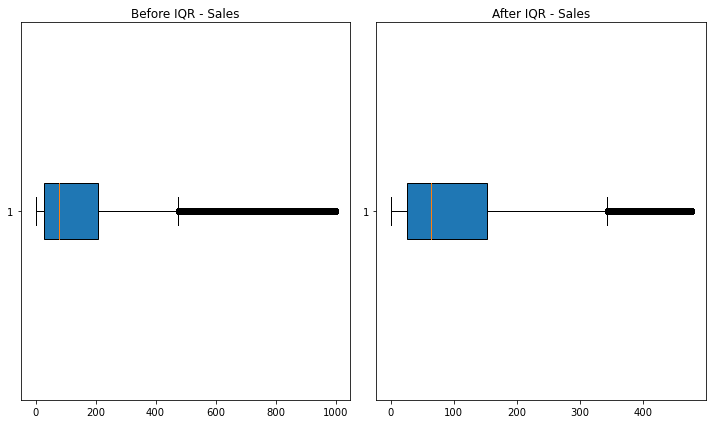

In [8]:
# Outlier detection and treatment using IQR (Interquartile Range)

# Visualize outliers for 'sales' before IQR
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['sales'], vert=False, patch_artist=True)
plt.title('Before IQR - Sales')

# Apply IQR to remove outliers
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

# Visualize outliers for 'sales' after IQR
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['sales'], vert=False, patch_artist=True)
plt.title('After IQR - Sales')

plt.tight_layout()
plt.show()

### Observations:
- **Before IQR - Sales:**<br>
    Original dataset has a significant number of data points are classified as outliers (extreme sales values), which could distort statistical analyses.
- **After IQR - Sales:**<br>
    The dataset now contains only values within the IQR-defined range, the remaining data is more concentrated around the median suggesting that the IQR method successfully filtered out high outliers.

## 3.5 <a id="add_derived_columns">Add derived columns</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [9]:
# Add derived columns
# Calculate profit margin
df_cleaned = df_cleaned.copy()
df_cleaned['profit_margin'] = df_cleaned['profit'] / df_cleaned['sales']

# Calling the custom basic_info function to validate changes  
basic_info(df_cleaned)

Shape of this dataset is (44152, 22).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44152 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        44152 non-null  object        
 1   order_date      44152 non-null  datetime64[ns]
 2   ship_date       44152 non-null  datetime64[ns]
 3   ship_mode       44152 non-null  object        
 4   customer_name   44152 non-null  object        
 5   segment         44152 non-null  object        
 6   state           44152 non-null  object        
 7   country         44152 non-null  object        
 8   market          44152 non-null  object        
 9   region          44152 non-null  object        
 10  product_id      44152 non-null  object        
 11  category        44152 non-null  object        
 12  sub_category    44152 non-null  object        
 13  product_name    44152 non-null  object        
 14  sales           

### Effectiveness of Cleaning
- **Outliers Removed:**<br>
    Extreme outliers in key columns (e.g., sales, profit) were successfully removed, bringing their ranges closer to typical values.
- **No Missing Data:**<br>
    The dataset is complete and ready for analysis without interruptions due to null values.
- **Valid Data Types:**<br>
    All columns have appropriate data types, ensuring smooth computation and modeling.
- **Potential Edge Cases:**<br>
    While the dataset is clean, the presence of -inf in profit_margin points to specific edge cases requiring further attention.

In [10]:
# Handle `-inf` in `profit_margin`
# Replace -inf values with NaN
df_cleaned['profit_margin'].replace([-float('inf'), float('inf')], float('nan'), inplace=True)

# Drop rows where `sales` is 0 (since `profit_margin` calculation becomes undefined)
df_cleaned = df_cleaned[df_cleaned['sales'] > 0]

# Calling the custom basic_info function to validate changes  
basic_info(df_cleaned)

Shape of this dataset is (44151, 22).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44151 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        44151 non-null  object        
 1   order_date      44151 non-null  datetime64[ns]
 2   ship_date       44151 non-null  datetime64[ns]
 3   ship_mode       44151 non-null  object        
 4   customer_name   44151 non-null  object        
 5   segment         44151 non-null  object        
 6   state           44151 non-null  object        
 7   country         44151 non-null  object        
 8   market          44151 non-null  object        
 9   region          44151 non-null  object        
 10  product_id      44151 non-null  object        
 11  category        44151 non-null  object        
 12  sub_category    44151 non-null  object        
 13  product_name    44151 non-null  object        
 14  sales           

### Observations:
The cleaned dataset is now ready and free of the issues

In [11]:
# Save the final cleaned dataset to a CSV file
final_cleaned_data_path = "Final_Cleaned_Superstore_Dataset.csv"
df_cleaned.to_csv(final_cleaned_data_path, index=False)

final_cleaned_data_path

'Final_Cleaned_Superstore_Dataset.csv'

# 4. <a id="descritive_analysis">Descriptive Analysis</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 4.1 <a id="overall_sales_and_profit_trends">Overall Sales and Profit Trends</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

### Overall Sales and Profit Trends by Year

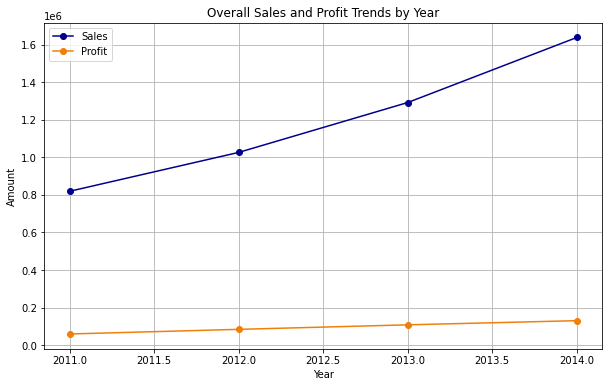

In [12]:
# Overall sales and profit trends
overall_sales_profit = df_cleaned.groupby('year')[['sales', 'profit']].sum()

plt.figure(figsize=(10, 6))
plt.plot(overall_sales_profit.index, overall_sales_profit['sales'], label='Sales', marker='o', color='darkblue')
plt.plot(overall_sales_profit.index, overall_sales_profit['profit'], label='Profit', marker='o', color='#F07F09')
plt.title('Overall Sales and Profit Trends by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()


### Observations:
- Sales have consistently increased year over year, showing a positive growth trend.
- Profit also shows a gradual increase but remains significantly lower compared to sales.
- **Insights:**
    - The business is growing in terms of sales volume, but profit margins appear to be relatively small.
    - Further analysis could explore why profits are not increasing at the same rate as sales (e.g., high discounts, operational costs, or unprofitable products).


### Sales vs. Profit by Category

<Figure size 720x432 with 0 Axes>

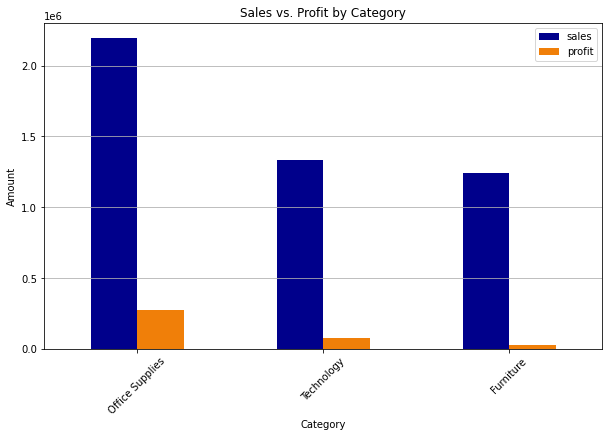

In [13]:
# Category-level analysis
category_analysis = df_cleaned.groupby('category')[['sales', 'profit']].sum().sort_values(by='profit', ascending=False)

plt.figure(figsize=(10, 6))
category_analysis[['sales', 'profit']].plot(kind='bar', figsize=(10, 6), color=['darkblue', '#F07F09'])
plt.title('Sales vs. Profit by Category')
plt.ylabel('Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Observations:
- Office Supplies has the highest sales and profit among all categories.
- Technology has moderate sales and profit.
- Furniture has high sales but low profit, suggesting smaller margins or operational inefficiencies.
- **Insights:**
    - Focus on improving profitability in the Furniture category.
    - Office Supplies is the most profitable category and should be a priority for expansion or marketing.


## 4.2 <a id="performance_by_customers_segments">Performance by Customers Segments</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

### Sales and Profit by Customers Segments

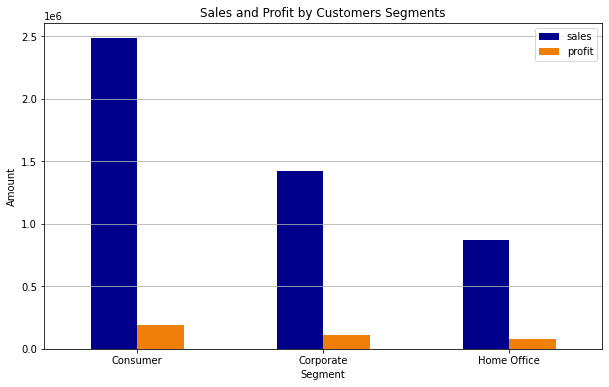

In [14]:
# Segment-level analysis
segment_analysis = df_cleaned.groupby('segment')[['sales', 'profit']].sum().sort_values(by='profit', ascending=False)

segment_analysis.plot(kind='bar', figsize=(10, 6), color=['darkblue', '#F07F09'])
plt.title('Sales and Profit by Customers Segments')
plt.ylabel('Amount')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Observations:
- Consumer Segment has the highest sales and profit.
- Corporate Segment and Home Office show lower sales and profits.
- **Insights:**
    - The Consumer Segment is the key driver of revenue and profit, suggesting that marketing and operational efforts should focus more on this segment.
    - Explore opportunities to grow Corporate and Home Office segments to balance revenue streams.


### Sales and Profit by Region

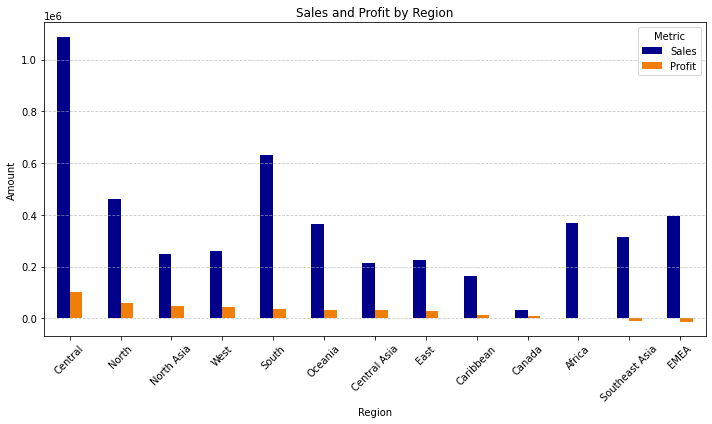

In [15]:
# Region analysis

# Group the data by region to get total sales and profit for each region
region_analysis = df_cleaned.groupby('region')[['sales', 'profit']].sum().sort_values(by='profit', ascending=False)

# Plot the sales and profit for each region with separate bars
region_analysis.plot(kind='bar', figsize=(10, 6), color=['darkblue', '#F07F09'])

# Add titles and labels
plt.title('Sales and Profit by Region')
plt.ylabel('Amount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(['Sales', 'Profit'], title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### Observations:

- **Central Region**<br>
    - Dominates both sales and profit.
    - Indicates this region is the primary revenue generator.
- **South Region**<br>
    - Shows high sales, but profits are comparatively much smaller.
    - This could suggest operational inefficiencies, high discounts, or high costs in this region.
- **Africa, Southeast Asia, and EMEA**<br>
    - Moderate sales and low profits.
    - These regions may not be as profitable due to high costs or low pricing strategies.
- **Canada and Caribbean**<br>
    - Minimal sales and almost negligible profit.
    - These regions might not be key contributors to the business currently.
- **North Asia and Oceania**<br>
    - Moderate sales but very low profit margins.
    - Indicates potential challenges in scaling profitability despite reasonable sales.


# 5. <a id="products_profitability_analysis">Products Profitability Analysis</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 5.1 <a id="top_10_most_and_least_profitable_products">Top 10 Most and Least Profitable Products</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

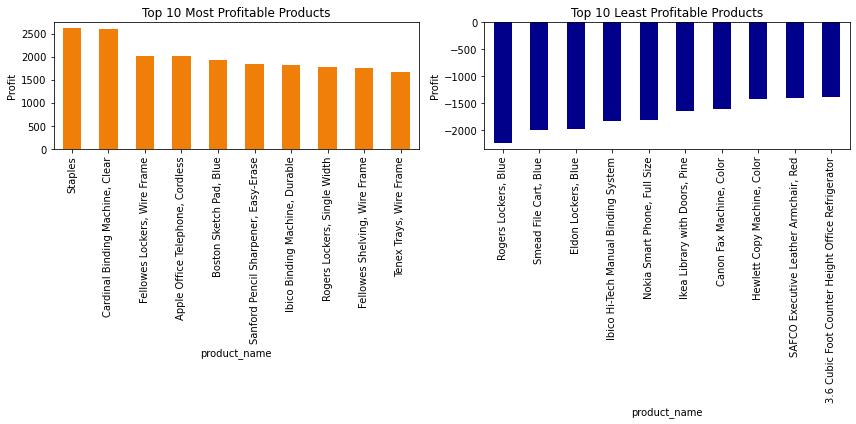

In [16]:
# Most and least profitable products
most_profitable_products = (
    df_cleaned.groupby('product_name')['profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

least_profitable_products = (
    df_cleaned.groupby('product_name')['profit']
    .sum()
    .sort_values()
    .head(10)
)

plt.figure(figsize=(12, 6))

# Plot most profitable products
plt.subplot(1, 2, 1)
most_profitable_products.plot(kind='bar', color='#F07F09')
plt.title('Top 10 Most Profitable Products')
plt.ylabel('Profit')
plt.xticks(rotation=90)

# Plot least profitable products
plt.subplot(1, 2, 2)
least_profitable_products.plot(kind='bar', color='darkblue')
plt.title('Top 10 Least Profitable Products')
plt.ylabel('Profit')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Observations:
- **Most Profitable Products:**
    Products like "Staples" and "Cardinal Binding Machine" are highly profitable.
- **Least Profitable Products:**
    Several products, such as "Rogers Lockers" and "Smead File Cart" show significant losses.
- **Insights:**
    - The least profitable products might need to be reassessed for discontinuation, cost optimization, or strategic discounts.
    - Most profitable products should be prioritized in inventory and marketing efforts.


## 5.2 <a id="profit_vs_sales_correlation">Profit vs. Sales Correlation</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

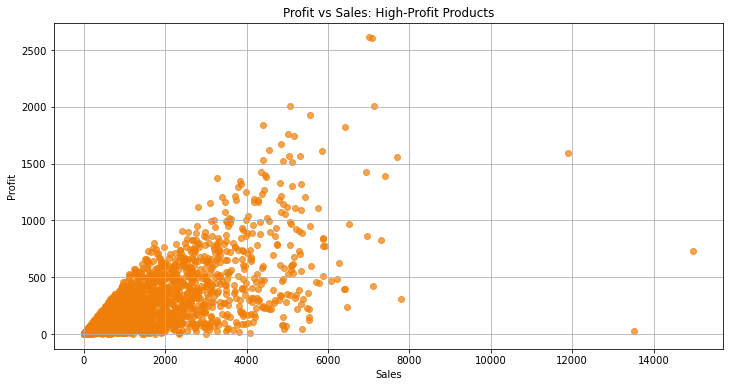

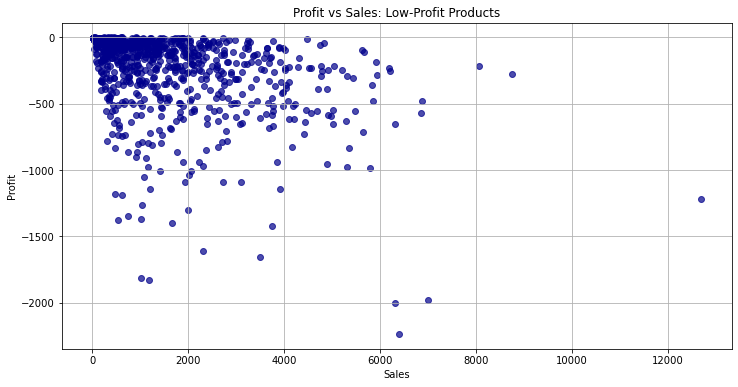

{'High-Profit Products Correlation': 0.7215783669043353,
 'Low-Profit Products Correlation': -0.38788251452024686}

In [17]:
# Profit vs Sales correlation for High- and Low-Profit Products

# Group products by total profit and sales
product_analysis = df_cleaned.groupby('product_name')[['sales', 'profit']].sum()

# Divide products into High-Profit and Low-Profit categories
high_profit_products = product_analysis[product_analysis['profit'] > 0]
low_profit_products = product_analysis[product_analysis['profit'] <= 0]

# Plot Profit vs Sales for High-Profit Products
plt.figure(figsize=(12, 6))
plt.scatter(high_profit_products['sales'], high_profit_products['profit'], color='#F07F09', alpha=0.7)
plt.title('Profit vs Sales: High-Profit Products')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Plot Profit vs Sales for Low-Profit Products
plt.figure(figsize=(12, 6))
plt.scatter(low_profit_products['sales'], low_profit_products['profit'], color='darkblue', alpha=0.7)
plt.title('Profit vs Sales: Low-Profit Products')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Correlation analysis
high_profit_correlation = high_profit_products.corr()
low_profit_correlation = low_profit_products.corr()

{
    "High-Profit Products Correlation": high_profit_correlation.loc['sales', 'profit'],
    "Low-Profit Products Correlation": low_profit_correlation.loc['sales', 'profit']
}


### Observations:
- **High-Profit Products** <br>
    - The scatterplot and correlation coefficient (0.72) indicate a strong positive correlation between sales and profit.
    - **Insights:** <br>
        High-Profit Products should be prioritized for scaling efforts and marketing
- **Low-Profit Products** <br>
    - The scatterplot reveals a weak negative correlation (-0.38) between sales and profit.
    - Many low-profit products have high sales but result in losses or minimal profits.
    - There’s a visible cluster near zero profit, suggesting products that break even or incur small losses.
- **Insights** <br>
    - High-sales, low-profit products need a closer review of pricing and operational costs to identify inefficiencies.
    - Some products with both low sales and low profits could be candidates for discontinuation.
    - Products showing consistent losses should be flagged for potential re-pricing, cost-cutting, or elimination.


### General Takeaways
- **Growth Opportunities** <br>
    - Focus on profitable categories (e.g., Office Supplies) and high-performing regions (e.g., Central).
    - Address inefficiencies in low-profit categories and regions.
- **Strategic Focus** <br>
    - Invest in the Consumer segment, which drives the majority of sales and profit.    
- **Product Portfolio** <br>
    - **High-Profit Products** <br>
        - Invest in scaling operations for high-profit products.
        - Use these products as a benchmark for improving performance in other areas.
    - **Low-Profit Products** <br>
        - For high-sales, low-profit products, investigate cost structures, discounting strategies, and operational efficiencies.
        - Consider discontinuing products with consistently low sales and profits.


# 6. <a id="impact_of_discount_strategies">Impact of Discount Strategies</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 6.1 <a id="regression_analysis">Regression Analysis</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>
    


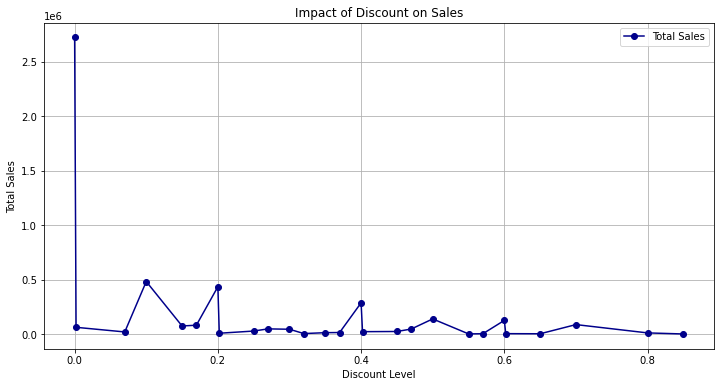

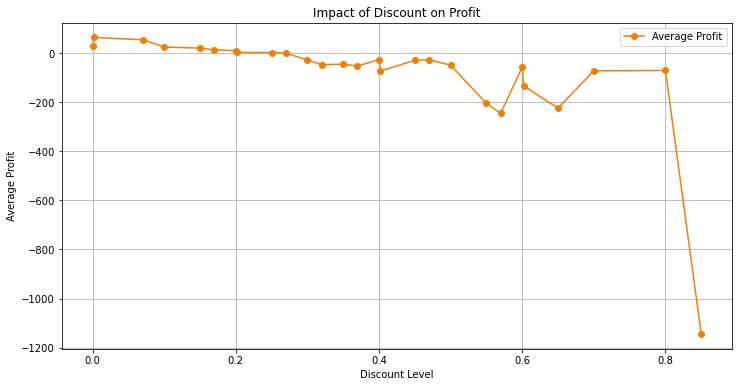

In [18]:
# Group data by discount levels to analyze their impact on sales
discount_analysis = df_cleaned.groupby('discount')[['sales']].sum()

# Add average profit per discount level to the analysis
discount_analysis['avg_profit'] = df_cleaned.groupby('discount')['profit'].mean()

# Plot sales trends for different discount levels
plt.figure(figsize=(12, 6))
plt.plot(discount_analysis.index, discount_analysis['sales'], marker='o', color='darkblue', label='Total Sales')
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount Level')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

# Plot average profit trends for different discount levels
plt.figure(figsize=(12, 6))
plt.plot(discount_analysis.index, discount_analysis['avg_profit'], marker='o', color='#F07F09', label='Average Profit')
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount Level')
plt.ylabel('Average Profit')
plt.grid(True)
plt.legend()
plt.show()

### Observations
- **Impact of Discounts on Sales** <br>
    - Sales are highest at a 0% discount level, indicating that a significant portion of revenue comes from products sold at full price.
    - **Insights** <br>
        - Discounts do not always lead to higher sales.
        - Applying steep discounts is not a guaranteed method for boosting revenue and may sweep away profitability.

- **Impact of Discounts on Profit** <br> 
    - Profit decreases drastically as discounts increase.
    - At higher discount levels (e.g., 80%+), profit turns negative, indicating significant losses for those transactions.
    - **Insights** <br>
        - Higher discounts erode profits significantly
        - Moderate discounts (e.g., 10%-30%) seem to balance sales growth and profitability.


### Correlation between discount and sales/profit

In [19]:
# Correlation between discount and sales/profit
discount_correlation = df_cleaned[['discount', 'sales', 'profit']].corr()

discount_analysis_summary = {
    "Correlation between discount and sales/profit": discount_correlation.loc['discount', ['sales', 'profit']],
    "Discount Analysis Data": discount_analysis
}

discount_analysis_summary

{'Correlation between discount and sales/profit': sales    -0.124927
 profit   -0.535301
 Name: discount, dtype: float64,
 'Discount Analysis Data':               sales   avg_profit
 discount                        
 0.000     2723424.0    27.328804
 0.002       61446.0    63.690600
 0.070       18838.0    54.402167
 0.100      481823.0    24.751984
 0.150       73636.0    20.127794
 0.170       80792.0    13.232295
 0.200      434269.0     9.840611
 0.202        7030.0     2.881577
 0.250       27081.0     2.198424
 0.270       47015.0    -0.522097
 0.300       43634.0   -27.601827
 0.320        4027.0   -46.931218
 0.350       12104.0   -45.133793
 0.370       13663.0   -52.853400
 0.400      286250.0   -26.639875
 0.402       21380.0   -73.149185
 0.450       23088.0   -29.502401
 0.470       45623.0   -27.724386
 0.500      138533.0   -49.004534
 0.550        1095.0  -205.029500
 0.570        2330.0  -245.365600
 0.600      124899.0   -57.147724
 0.602        3214.0  -133.609814
 0

### Observations
- **Discount vs. Sales**<br>
    - Correlation: -0.124979 (weak negative correlation).
    - Discounts do not strongly influence sales growth. Other factors, such as product demand, customer loyalty, and market conditions, may have a larger impact.
- **Discount vs. Profit**<br>
    - Correlation: -0.535259 (moderate negative correlation).
    - Higher discounts lead to a measurable decline in profitability, indicating the importance of balancing discount levels to avoid eroding profit margins.


### General Takeaways
- **Steep Discounts Are Risky**<br>
    - Discounts over 30% lead to diminishing sales returns and significantly reduced profitability. Use such discounts sparingly and only for strategic purposes (e.g., clearing inventory).
- **Optimal Discount Range**<br>
    - Discounts in the range of 10%-30% may balance increased sales with acceptable profit margins. This range should be targeted in promotional strategies.
- **Focus on Full-Price Sales**<br>
    - Products with strong demand can be sold with minimal or no discounts to maximize revenue and profitability.


## 6.2 <a id="optimal_discount_range">Optimal Discount Range</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

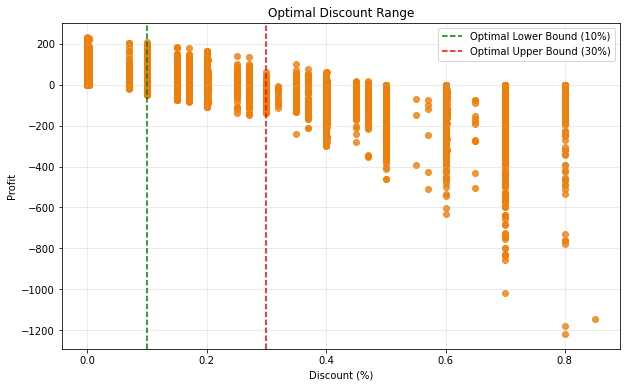

In [20]:
# Scatter plot: Discount vs. Profit
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['discount'], df_cleaned['profit'], color='#F07F09', alpha = 0.8)
plt.title('Optimal Discount Range')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.axvline(0.1, color='green', linestyle='--', label='Optimal Lower Bound (10%)')
plt.axvline(0.3, color='red', linestyle='--', label='Optimal Upper Bound (30%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Observations

- Within the range 10-30%, most transactions appear to have positive or near-zero profits. This suggests that offering discounts within this range is generally profitable.
- Beyond the upper bound (30%) many transactions resulting in negative profit, that indicates that discounts above 30% tend to erode profitability significantly.
- Transactions with discounts below the lower bound (10%) show less variability in profit, this suggests that minimal discounts may preserve margins but might not drive higher sales volume.
- **Insights:**
    - The optimal discount range is 10%–30%, balancing profitability and sales volume.
    - Avoid discounts beyond 30% as they result in diminished returns or losses.

### High-Profit Products Discount Range

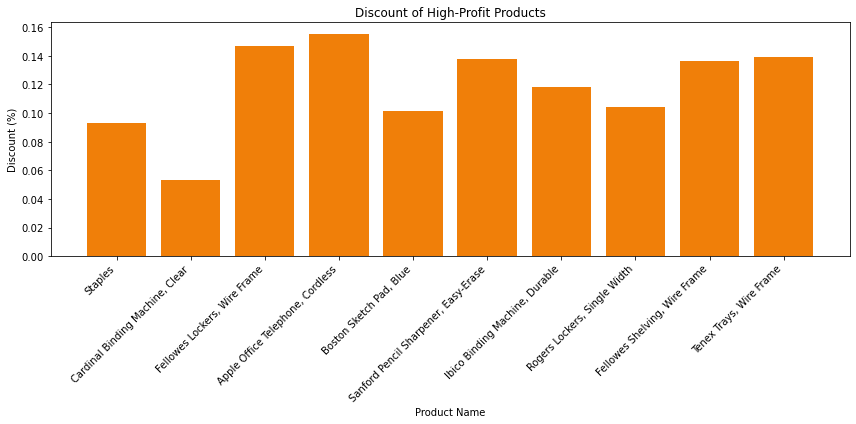

In [21]:
# Calculate optimal discount % for high-profit products

# Filtering high-profit products
high_profit_products = df_cleaned.groupby('product_name').agg(
    sales=('sales', 'sum'),
    profit=('profit', 'sum'),
    discount=('discount', 'mean')
).reset_index()

# Displaying results
high_profit_df = high_profit_products.sort_values(by='profit', ascending=False).head(10)

# Plot for high-profit products
plt.figure(figsize=(12, 6))
plt.bar(high_profit_df['product_name'], high_profit_df['discount'], color='#F07F09')
plt.title("Discount of High-Profit Products")
plt.xlabel("Product Name")
plt.ylabel("Discount (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights
- The optimal discount percentages for high-profit products are relatively low, typically below 15%. This suggests that these products are profitable even with minimal discounts.
- Offering excessive discounts on these products may not significantly improve their profitability and could potentially reduce the overall profit margins. Therefore, it's essential to maintain discounts within the identified optimal range.

### High-Sales Low-Profit Products Analysis

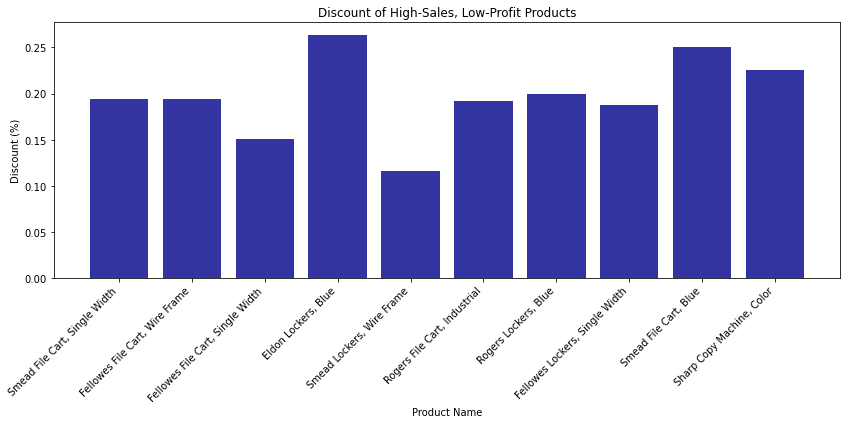

In [22]:
# Calculate optimal discount % for products with high sales but low profit

# Filtering high-sales low-profit products
high_sales_low_profit_products = high_profit_products[
    (high_profit_products['sales'] > high_profit_products['sales'].quantile(0.75)) &
    (high_profit_products['profit'] < high_profit_products['profit'].quantile(0.25))
]

# Displaying results
high_sales_low_profit_df = high_sales_low_profit_products.sort_values(by='sales', ascending=False).head(10)

# Plot for high-sales, low-profit products
plt.figure(figsize=(12, 6))
plt.bar(high_sales_low_profit_df['product_name'], high_sales_low_profit_df['discount'], color='darkblue', alpha=0.8)
plt.title("Discount of High-Sales, Low-Profit Products")
plt.xlabel("Product Name")
plt.ylabel("Discount (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights
- The optimal discount percentages for high-sales, low-profit products are generally higher compared to high-profit products. They range from around 15% to 25%, reflecting the need to incentivize purchases while managing low profit margins.
- **Strategic Focus:** <br>
    - Increasing sales volume at these discounts can compensate for low profitability.
    - They are suitable candidates for bundling with more profitable items to improve overall profitability.
    - It may be worth exploring if reducing the discount slightly (while maintaining competitive pricing) could improve profit margins without significantly affecting sales volume.

# 7. <a id="product_bundling_opportunities">Product Bundling Opportunities</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

To analyze the potential improvement in profitability by bundling high-sales low-profit products with high-profit products, we can follow these steps:

## 7.1 <a id="analyze_orders_sales_data">Analyze Orders Sales Data</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [23]:
# Calculate the total sales and profit for each combination of products
bundle_analysis = df_cleaned.groupby(['order_id'])[['sales', 'profit']].sum()

# Summarize data for insights
bundle_summary = bundle_analysis.describe()

print("Bundle Profitability Summary")
print('='*50)
bundle_summary

Bundle Profitability Summary


,sales,profit
count,23197.000000,23197.000000
mean,205.804199,16.436425
std,212.275801,97.602901
min,1.000000,-1653.096000
25%,49.000000,0.000000
50%,134.000000,14.109800
75%,299.000000,49.560000
max,2050.000000,568.557000


### Observations
- There are 23,197 unique orders with average sales per order of 205.80. 
- The sales vary significantly, with a standard deviation of 212.28, indicating wide differences in order sizes.
- The average profit per order is 16.43, which is relatively small compared to the average sales.
- Profit also shows a large variance of 97.60, suggesting some orders are highly profitable while others are not.
- The large gap between the mean and max sales/profit compared to the percentiles indicates a skewed distribution, with a small number of high-value orders disproportionately contributing to total sales and profit.
- **Insights** <br>
    - Identifying and analyzing the characteristics of high-sales and high-profit orders could reveal opportunities for product bundling to replicate their success.

### Observations

- The chart show the profitability of bundeled orders (having at least 2 products in a bundled transaction)
- The orders on the left side of the chart represent the most profitable bundled transactions.
- The orders on the right side of the chart are associated with significant losses.
- There is a significant variation in the profitability of bundled transactions, from highly profitable bundles (positive profits) to loss-making bundles (negative profits).
- **Insights**<br>
    - Orders with substantial negative profits suggest opportunities to revise bundling strategies:
        - Evaluate the discounts applied—ensure they fall within the identified optimal range (10%-30% from previous analyses).
        - Check whether low-profit products can be replaced with alternative high-margin items.

## 7.2 <a id="analysing_bundling_high_profit_products">Analysing bundling High-profit products</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

### Create a Bundling Dataset

In [24]:
# Identify high-profit products

high_profit_products = df_cleaned.groupby('product_name').agg(
    sales=('sales', 'sum'),
    profit=('profit', 'sum'),
    discount=('discount', 'mean')
).reset_index()
high_profit_products = high_profit_products.sort_values(by='profit', ascending=False).head(10)

print('High-Profit Products')
print('='*50)
high_profit_products

High-Profit Products


,product_name,sales,profit,discount
3122,Staples,7009.0,2611.0694,0.093392
837,"Cardinal Binding Machine, Clear",7081.0,2608.0257,0.053333
1360,"Fellowes Lockers, Wire Frame",7131.0,2008.6940,0.146923
299,"Apple Office Telephone, Cordless",5058.0,2007.4170,0.155556
676,"Boston Sketch Pad, Blue",5549.0,1927.3360,0.101707
2921,"Sanford Pencil Sharpener, Easy-Erase",4393.0,1837.8950,0.137755
1859,"Ibico Binding Machine, Durable",6418.0,1821.9780,0.117959
2710,"Rogers Lockers, Single Width",5009.0,1764.9990,0.104118
1375,"Fellowes Shelving, Wire Frame",5162.0,1743.6854,0.136471
3280,"Tenex Trays, Wire Frame",4848.0,1673.3320,0.139000


In [25]:
# Identify high-sales low-profit products

high_sales_low_profit_products = df_cleaned.groupby('product_name').agg(
    sales=('sales', 'sum'),
    profit=('profit', 'sum'),
    discount=('discount', 'mean')
).reset_index()
high_sales_low_profit_products = high_sales_low_profit_products[
    (high_sales_low_profit_products['sales'] > high_sales_low_profit_products['sales'].quantile(0.75)) &
    (high_sales_low_profit_products['profit'] < high_sales_low_profit_products['profit'].quantile(0.25))
]

print('High-Sales Low-Profit Products')
print('='*50)
high_sales_low_profit_products.sort_values(by='sales', ascending=False)

High-Sales Low-Profit Products


,product_name,sales,profit,discount
3027,"Smead File Cart, Single Width",12693.0,-1220.7052,0.194333
1351,"Fellowes File Cart, Wire Frame",8748.0,-276.0838,0.194250
1350,"Fellowes File Cart, Single Width",8068.0,-213.9006,0.151250
1171,"Eldon Lockers, Blue",6996.0,-1980.2424,0.263913
3043,"Smead Lockers, Wire Frame",6874.0,-475.1316,0.116087
...,...,...,...,...
1292,"Epson Inkjet, Wireless",1926.0,-1091.5830,0.307143
1051,"Deflect-O Stacking Tray, Erganomic",1925.0,-91.3392,0.191765
2285,"Motorola Office Telephone, with Caller ID",1924.0,-210.7012,0.265455
1394,"Fiskars Box Cutter, High Speed",1916.0,-108.0352,0.213913


### High-sales low-profit products bundled to high-profit products

In [26]:
# Identify transactions containing both product groups strictly
# Get orders that contain high-profit products
orders_with_high_profit = df_cleaned[df_cleaned['product_name'].isin(high_profit_products['product_name'])]

# Get orders that contain high-sales low-profit products
orders_with_low_profit = df_cleaned[df_cleaned['product_name'].isin(high_sales_low_profit_products['product_name'])]

# Find orders that have at least one high-profit product and one high-sales low-profit product
common_orders = set(orders_with_high_profit['order_id']).intersection(set(orders_with_low_profit['order_id']))

# Filter transactions to include only those orders
bundling_transactions = df_cleaned[
    (df_cleaned['order_id'].isin(common_orders)) &
    (df_cleaned['product_name'].isin(
        high_profit_products['product_name'].tolist() + high_sales_low_profit_products['product_name'].tolist()
    ))
]

In [27]:
# Group by order_id and aggregate
bundling_summary = bundling_transactions.groupby('order_id').agg({
    'sales': 'sum',
    'profit': 'sum',
    'discount': 'mean',
    'product_name': lambda x: '; '.join(x.unique())
}).reset_index()

bundling_summary.rename(columns={
    'sales': 'total_sales',
    'profit': 'total_profit',
    'discount': 'average_discount',
    'product_name': 'products_in_order'
}, inplace=True)

# Display Bundling Transactions
print('Transactions with High-sales low-profit products bundled to high-profit products')
print('='*50)
bundling_summary.sort_values(by='total_profit', ascending=False)


Transactions with High-sales low-profit products bundled to high-profit products


,order_id,total_sales,total_profit,average_discount,products_in_order
18,ES-2014-2296898,821.0,195.780,0.00,"Cardinal Binding Machine, Clear; Stiletto Shea..."
21,ES-2014-2938679,558.0,193.584,0.05,"Advantus Frame, Black; Tenex Trays, Wire Frame"
51,MO-2013-4200,614.0,193.380,0.00,"Tenex Trays, Wire Frame; Brother Fax and Copie..."
11,ES-2012-3231769,511.0,188.640,0.00,"Fellowes Lockers, Wire Frame; Eldon Shelving, ..."
32,IN-2013-59356,771.0,187.680,0.00,"Tenex Trays, Wire Frame; Motorola Speaker Phon..."
...,...,...,...,...,...
43,IT-2014-4709866,414.0,-204.165,0.50,"Acme Trimmer, Serrated; Apple Office Telephone..."
67,TU-2014-3560,283.0,-277.758,0.60,"Deflect-O Frame, Erganomic; Brother Fax and Co..."
39,IT-2011-4565126,640.0,-441.165,0.50,"Apple Signal Booster, Full Size; Fellowes Lock..."
57,NI-2013-9100,321.0,-465.291,0.70,"Motorola Office Telephone, Cordless; Sanford P..."


In [38]:
# Calculate profits and sales for products in bundled transactions
bundled_product_summary = bundling_transactions.groupby('product_name').agg(
    Bundled_Sales=('sales', 'sum'),
    Bundled_Profit=('profit', 'sum')
).reset_index()

# Identify unbundled transactions (standalone transactions)
unbundled_transactions = df_cleaned[~df_cleaned['order_id'].isin(bundling_transactions['order_id'])]

# Calculate profits and sales for products in unbundled transactions
unbundled_product_summary = unbundled_transactions.groupby('product_name').agg(
    Unbundled_Sales=('sales', 'sum'),
    Unbundled_Profit=('profit', 'sum')
).reset_index()

# Merge the two summaries to create a single DataFrame
product_summary = pd.merge(
    bundled_product_summary,
    unbundled_product_summary,
    on='product_name',
    how='outer'
).fillna(0)  # Fill NaN values with 0 for products not present in either category


# Calculate Bundled Profit Margin
product_summary['Bundled_Profit_Margin'] = (
    product_summary['Bundled_Profit'] / product_summary['Bundled_Sales']
).fillna(0)

# Calculate Unbundled Profit Margin
product_summary['Unbundled_Profit_Margin'] = (
    product_summary['Unbundled_Profit'] / product_summary['Unbundled_Sales']
).fillna(0)

# Display DataFrame
product_summary

,product_name,Bundled_Sales,Bundled_Profit,Unbundled_Sales,Unbundled_Profit,Bundled_Profit_Margin,Unbundled_Profit_Margin
0,"Acme Trimmer, Serrated",186.0,-141.210,2154.0,122.1464,-0.759194,0.056707
1,"Advantus Frame, Black",222.0,44.400,2792.0,-539.4940,0.200000,-0.193229
2,"Apple Office Telephone, Cordless",469.0,80.937,4589.0,1926.4800,0.172574,0.419804
3,"Apple Signal Booster, Cordless",140.0,34.860,5503.0,-747.5400,0.249000,-0.135842
4,"Apple Signal Booster, Full Size",414.0,-372.600,3431.0,-566.7420,-0.900000,-0.165183
...,...,...,...,...,...,...,...
3620,iKross Bluetooth Portable Keyboard + Cell Phon...,0.0,0.000,479.0,115.6440,0.000000,0.241428
3621,iOttie HLCRIO102 Car Mount,0.0,0.000,216.0,-11.9940,0.000000,-0.055528
3622,iOttie XL Car Mount,0.0,0.000,224.0,-50.3748,0.000000,-0.224887
3623,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,0.0,0.000,442.0,171.2648,0.000000,0.387477


In [39]:
# Save the result to a CSV file (optional)
product_summary.to_csv('product_summary.csv', index=False)

### Bundled Orders Profitability

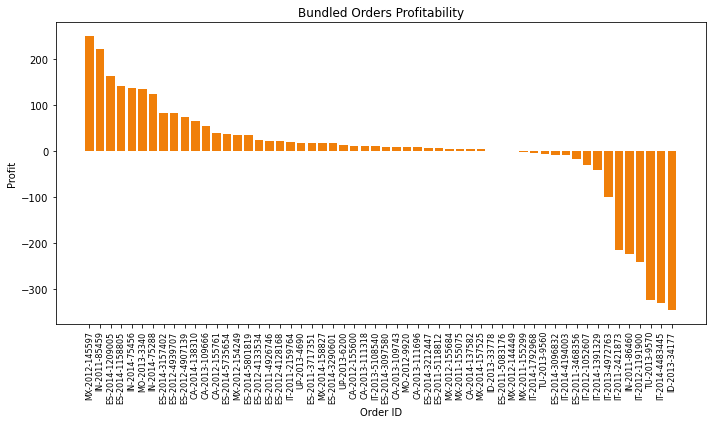

In [29]:
# Aggregate sales, profit, and discount for general bundling transactions
general_bundling_summary = df_cleaned.groupby('order_id').agg({
    'sales': 'sum',
    'profit': 'sum',
    'discount': 'mean'
}).rename(columns={
    'sales': 'Bundling Total Sales',
    'profit': 'Bundling Total Profit',
    'discount': 'Average Discount'
}).reset_index()

# Filtering orders with at least 2 products
general_bundling_summary['Product Count'] = bundling_transactions.groupby('order_id')['product_name'].transform('nunique')
filtered_bundling_summary = general_bundling_summary[general_bundling_summary['Product Count'] >= 2]

# Sort the filtered bundling summary by profit
sorted_bundling_summary = filtered_bundling_summary.sort_values(by='Bundling Total Profit', ascending=False)

# Plot the updated profitability of bundling transactions
plt.figure(figsize=(10, 6))
plt.bar(
    sorted_bundling_summary['order_id'],
    sorted_bundling_summary['Bundling Total Profit'],
    color='#F07F09'
)
plt.title("Bundled Orders Profitability")
plt.xlabel("Order ID")
plt.ylabel("Profit")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


### Observations
- **Positive Profit Orders:**<br> 
    The bars on the left are bundled orders where the revenue exceeds the associated costs and discounts.
- **Negative Profit Orders:**<br>
    The bars on the right represent orders with negative profitability. These are likely due to high discounts or costs exceeding revenue.
- **Insights:**<br> 
    Negative-profit orders may need attention to understand why they are unprofitable—perhaps discounts are too high, or bundling is applied inefficiently.

###  Bundling vs Non-Bundling Profitability Comparison

In [30]:
# Step 1: Identify remaining transactions with only high-sales, low-profit products
remaining_transactions = df_cleaned[
    (df_cleaned['order_id'].isin(orders_with_low_profit['order_id'])) &  # Orders with low-profit products
    (~df_cleaned['order_id'].isin(bundling_transactions['order_id']))   # Exclude bundled orders
]

# Step 2: Aggregate profitability metrics for each subset
# Aggregation for bundling_transactions
bundling_profitability = bundling_transactions.agg({
    'sales': 'sum',
    'profit': 'sum'
}).rename({'sales': 'Bundling Total Sales', 'profit': 'Bundling Total Profit'})

# Aggregation for remaining_transactions
remaining_profitability = remaining_transactions.agg({
    'sales': 'sum',
    'profit': 'sum'
}).rename({'sales': 'Non-Bundling Total Sales', 'profit': 'Non-Bundling Total Profit'})

# Step 3: Add Profit Margins
bundling_profitability['Profit Margin (%)'] = (bundling_profitability['Bundling Total Profit'] / 
                                               bundling_profitability['Bundling Total Sales']) * 100

remaining_profitability['Profit Margin (%)'] = (remaining_profitability['Non-Bundling Total Profit'] / 
                                                remaining_profitability['Non-Bundling Total Sales']) * 100

# Step 4: Combine Results for Comparison
comparison = pd.concat([bundling_profitability, remaining_profitability], axis=1)

# Display Bundling Transactions
print('Bundling vs Non-Bundling Profitability Comparison')
print('='*50)
comparison

Bundling vs Non-Bundling Profitability Comparison


,0,1
Bundling Total Sales,27929.000000,NaN
Bundling Total Profit,1163.134800,NaN
Profit Margin (%),4.164613,-3.289304e+00
Non-Bundling Total Sales,NaN,1.407253e+06
Non-Bundling Total Profit,NaN,-4.628883e+04


### Insights

The results of the comparison between bundling transactions and non-bundling transactions reveal key insights:
- **Bundling Transactions**:<br>
    - Total Sales: 27,929.00
    - Total Profit: 1,163.13
    - Profit Margin: ~4.16%:<br>
- **Non-Bundling Transactions**:<br>
    - Total Sales: 1,407,525.00
    - Total Profit: -46,288.83 (negative profit)
    - Profit Margin: -3.29%
- **Interpretation**<br>    
    - Bundling high-sales, low-profit products with high-profit products has a clear positive impact on profitability, turning a negative profit margin into a positive one.
    - Although the sales volume is much lower in bundled transactions compared to non-bundling transactions, the profit margin improves significantly. This indicates that bundling strategically boosts profitability for high-sales, low-profit products.

### Bundling Opportunities Recommendations

In [31]:
# Calculate the contribution of each high-profit product in the bundled transactions
high_profit_product_impact = bundling_transactions[bundling_transactions['product_name'].isin(high_profit_products['product_name'].tolist())]

# Aggregate total profit for each high-profit product within bundled transactions
product_impact_analysis = high_profit_product_impact.groupby('product_name').agg(
    total_sales=('sales', 'sum'),
    total_profit=('profit', 'sum'),
    average_discount=('discount', 'mean')
).sort_values(by='total_profit', ascending=False)

# Extract the top 3 high-profit products with the most impact
top_5_high_profit_products = product_impact_analysis.head(5)

# High-Profit Product Impact Analysis
print('High-Impact Product Contributions')
print('='*50)
top_5_high_profit_products

High-Impact Product Contributions


,total_sales,total_profit,average_discount
product_name,,,
"Cardinal Binding Machine, Clear",1966.0,750.6054,0.062667
"Boston Sketch Pad, Blue",1772.0,609.6600,0.108333
"Tenex Trays, Wire Frame",1289.0,578.0460,0.114286
"Fellowes Lockers, Wire Frame",2145.0,532.4100,0.106250
"Sanford Pencil Sharpener, Easy-Erase",1134.0,462.6420,0.150000


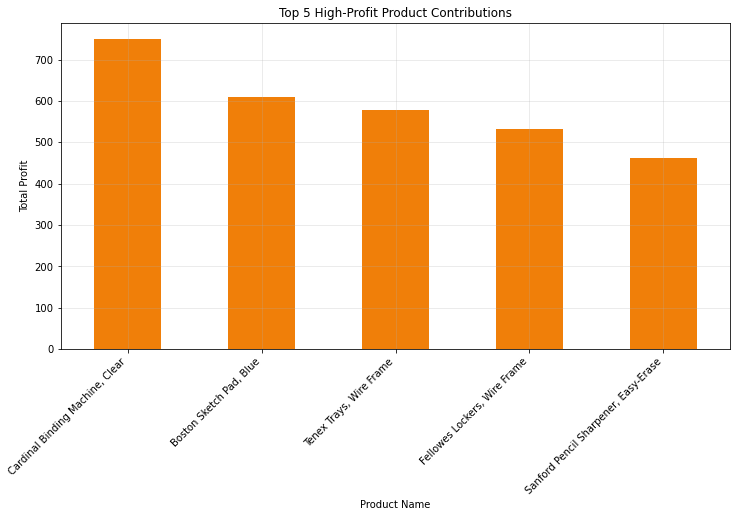

In [32]:
# Bar Chart for Top High-Profit Products
plt.figure(figsize=(12, 6))
product_impact_analysis['total_profit'].sort_values(ascending=False).head(5).plot(
    kind='bar', color='#F07F09'
)
plt.title('Top 5 High-Profit Product Contributions')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.show()

### Insights
- **Top 3 Contributors in boosting bundled transactions.**
    1. Cardinal Binding Machine, Clear: This product contributes the most to total profit with \$750.60 in profit.
    2. Boston Sketch Pad, Blue: This product generates a profit of \$609.66.
    3. Tenex Trays, Wire Frame: With a profit contribution of \$578.046.
- **Impactful Bundling:**
    - These products exhibit a high total profit and are thus key drivers of profitability when bundled.
    - Products like Cardinal Binding Machine and Boston Sketch Pad not only deliver high profitability but also moderate discounts (e.g., 6%–11%), making them attractive for strategic bundling.
- **Bundling Strategy:**
    - Including these products in bundles with low-profit, high-sales products can potentially improve the overall profitability of the transactions.
    - Their relatively low discount percentages ensure they retain profitability while boosting the attractiveness of the bundles.
- **Recommendations:**
    - Focus on including Cardinal Binding Machine, Boston Sketch Pad, and Tenex Trays in bundles with low-profit, high-sales products to maximize the financial impact.
    - Ensure that discounts for these products remain minimal while leveraging their high-profit margins to offset losses from low-profit products.

#### Preprocessing for data visualisation

In [40]:
# Step 1: Identify bundled transactions (those with more than 1 product in an order)
df_cleaned['Product Count'] = df_cleaned.groupby('order_id')['product_name'].transform('nunique')
bundled_transactions = df_cleaned[df_cleaned['Product Count'] > 1]

# Step 2: Calculate Bundled Sales and Bundled Profit for each product
bundled_product_summary = bundled_transactions.groupby('product_name').agg(
    Bundled_Sales=('sales', 'sum'),
    Bundled_Profit=('profit', 'sum')
).reset_index()

# Step 3: Identify unbundled transactions (those with only 1 product in an order)
unbundled_transactions = df_cleaned[df_cleaned['Product Count'] == 1]

# Step 4: Calculate Unbundled Sales and Unbundled Profit for each product
unbundled_product_summary = unbundled_transactions.groupby('product_name').agg(
    Unbundled_Sales=('sales', 'sum'),
    Unbundled_Profit=('profit', 'sum')
).reset_index()

# Step 5: Merge Bundled and Unbundled summaries
product_summary = pd.merge(
    bundled_product_summary,
    unbundled_product_summary,
    on='product_name',
    how='outer'
).fillna(0)  # Fill NaN values with 0 for products not present in either category

product_summary

,product_name,Bundled_Sales,Bundled_Profit,Unbundled_Sales,Unbundled_Profit
0,"""While you Were Out"" Message Book, One Form pe...",16.0,7.0490,9.0,3.3390
1,"#10 Gummed Flap White Envelopes, 100/Box",25.0,11.3988,17.0,5.3690
2,#10 Self-Seal White Envelopes,98.0,46.6889,11.0,5.4341
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",326.0,151.5289,163.0,71.6119
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",251.0,98.8494,34.0,16.4312
...,...,...,...,...,...
3621,Xerox 190,0.0,0.0000,30.0,14.0436
3622,Xerox 1902,0.0,0.0000,83.0,32.8896
3623,Xerox 1984,0.0,0.0000,13.0,6.3504
3624,Xerox 1989,0.0,0.0000,8.0,2.6892


# 8. <a id="summary_insights">Summary Insights</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 8.1. <a id="optimization_recommendations">Optimization Recommendations</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

- **Product Bundling**
    - Prioritize bundling low-profit, high-sales products with the top 3 high-profit products ("Cardinal Binding Machine, Clear", "Boston Sketch Pad, Blue", and "Tenex Trays, Wire Frame").
- **Discount Strategy**
    - Focus on moderate discounts (10%-30%) for high-sales, low-profit products to balance sales growth and profitability.
    - Limit or eliminate discounts for high-demand products with strong profit margins.
- **Category-Level Focus**
    - Expand inventory and marketing for high-profit categories like Office Supplies.
    - Analyze and address inefficiencies in Furniture to improve its profit margins.
- **Regional Optimization**
    - Invest in marketing and operational improvements in high-potential regions like Central.
    - Reassess strategies for low-profit regions (e.g., Canada, Southeast Asia) to minimize losses.
- **A/B Testing**
    - Test the impact of different discount levels and bundling strategies on profit and customer behavior.
    - Measure customer response to bundled offerings involving high- and low-profit products

# 9. <a id="a_b_testing">A/B Testing</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

## 9.1. <a id="test_1_discount_strategy_testing">Test 1. Discount Strategy Testing</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

- **Objective:** 
    - Validate the optimal discount range (10%-30%) for maximizing profitability.
- **Null Hypothesis (H0):**
    - There is no significant difference in the average profit per transaction between the two discount ranges (10%-20% vs. 20%-30%).
        - $$ \text{H}_0: \mu_{1} = \mu_{2} $$
- **Alternative Hypothesis (H1):**
    - There is a significant difference in the average profit per transaction between the two discount ranges.
        - $$ \text{H}_0: \mu_{1} ≠ \mu_{2} $$ 
- **Groups:**<br> 
    - Group A: Transactions with 10%-20% discounts.
    - Group B: Transactions with 20%-30% discounts.
- **Metrics:**<br> 
    - Average profit per transaction.
- **User Segmentation:**<br> 
    - Geographical segmentation for localized discount impact.
- **Experiment Duration:**<br> 
    - Minimum: 2-4 weeks (to account for purchasing cycle variations).
- **Statistical Significance:**<br> 
    - Threshold (𝛼): 0.05
    - Confidence interval: 95%.

### Calculating sample size

- **General Assumptions**
    - Significance Level (α): 0.05 (5%)
    - Statistical Power (1−β): 0.8 (80%)
    - Effect Size: Assumed medium (Cohen's d=0.5) unless adjusted based on past performance data.

- Using **two-sample independent t-test** for testing differences in average profit per transaction

In [33]:
# Import necessary libraries for sample size calculation
from statsmodels.stats.power import TTestIndPower
from math import ceil  # Import the ceil function for rounding up

# Define known parameters
alpha = 0.05  # significance level
power = 0.8   # statistical power
effect_size = 0.5  # medium effect size (Cohen's d)

# Create an instance of the power analysis class
analysis = TTestIndPower()

# Calculate the sample size per group
sample_size_per_group_test1 = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

# Round up to the nearest integer
sample_size_per_group_test1 = ceil(sample_size_per_group_test1)


print('Sample size required per group - test 1:')
sample_size_per_group_test1

Sample size required per group - test 1:


64

## 9.2. <a id="test_2_product_bundling_strategies">Test 2. Product Bundling Strategies</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

- **Objective:**<br> 
    - Test the effectiveness of bundling high-sales low-profit products with high-profit products.
 - **Null Hypothesis (H0):**
    - Bundling high-sales low-profit products with high-profit products does not result in a significant increase in the average profit per transaction compared to standalone products.
        - $$ \text{H}_0: \mu_{bundle} = \mu_{standalone} $$
- **Alternative Hypothesis (H1):**
    - Bundling high-sales low-profit products with high-profit products results in a significant increase in the average profit per transaction compared to standalone products.
        - $$ \text{H}_1: \mu_{bundle} ≠ \mu_{standalone} $$    
- **Groups:**<br> 
    - Group A: Customers offered standalone high-sales low-profit products.
    - Group B: Customers offered bundles (e.g., high-sales low-profit products + high-profit product).
- **Metrics:**<br> 
    - Bundle profitability.
    - Sales volume of bundled products.
    - Profit margin per transaction.
- **User Segmentation:**<br> 
    - By customer segment (e.g., Consumer, Corporate, Home Office).
- **Experiment Duration:**<br> 
    - Minimum: 4-6 weeks (to capture sufficient transactions across segments).
- **Statistical Significance:**<br> 
    - Threshold (𝛼): 0.05
    - Confidence interval: 95%.

### Calculate sample size
- **General Assumptions**
    - Baseline average profit: 8.64\$ (mean from dataset)
    - Assumed improvement: +20%
    - Standard deviation: ~58\$ (STD from dataset)
- Using **paired t-test** for revenue or profit per transaction comparison:    

In [36]:
# Python code to calculate sample size for paired t-test based on provided parameters

from math import ceil
from statsmodels.stats.power import TTestIndPower

# Define parameters
alpha = 0.05  # Significance level
power = 0.8   # Statistical power
std_dev = 58  # Standard deviation (σ)
improvement = 0.2  # Assumed improvement (20%)
baseline_mean = 8.64  # Baseline average profit

# Calculate effect size (mean difference / standard deviation)
effect_size = (baseline_mean * improvement) / std_dev

# Create instance for power analysis
analysis = TTestIndPower()

# Calculate the required sample size
sample_size_per_group_test2 = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

# Round up to the nearest integer
sample_size_per_group_test2 = ceil(sample_size_per_group_test2)

print('Sample size required per group - test2:')
sample_size_per_group_test2


Sample size required per group - test2:


17686

## 9.3. <a id="test_simulation">Test simulation</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

In [34]:
from scipy.stats import ttest_ind

# Load the dataset (replace 'data' with the actual DataFrame)
df = df_cleaned

# Filter the groups based on discount ranges
group_a = df[(df['discount'] >= 0.10) & (df['discount'] <= 0.20)]
group_b = df[(df['discount'] > 0.20) & (df['discount'] <= 0.30)]

# Extract profit data for each group
profit_a = group_a['profit']
profit_b = group_b['profit']

# Calculate average profit per transaction for both groups
avg_profit_a = profit_a.mean()
avg_profit_b = profit_b.mean()

print(f"Average profit per transaction (Group A): {avg_profit_a}")
print(f"Average profit per transaction (Group B): {avg_profit_b}")

Average profit per transaction (Group A): 16.062381598557707
Average profit per transaction (Group B): -7.7392075668073215


In [35]:
# Perform a two-sample t-test
t_stat, p_value = ttest_ind(profit_a, profit_b, equal_var=False)  # Assuming unequal variances

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")


T-statistic: 15.189191291507921
P-value: 6.3314410426703986e-46
Reject the null hypothesis: There is a significant difference between the groups.


#### Observation
- T-statistic: 15.19
    - A large t-statistic indicates a substantial difference between the two groups.
- P-value: 6.33×10−46 (essentially 0)  
     - Since the p-value is much smaller than the significance level α=0.05), the result is statistically significant.

#### Conclusion
- **Reject the Null Hypothesis (HO):**<br> 
    There is a statistically significant difference in the average profit per transaction between the two discount ranges (10%-20% and 20%-30%).
- **Implication:** 
    - Offering higher discounts (20%-30%) leads to significantly lower profitability, even resulting in losses. 
    - This suggests that the 10%-20% discount range is much more effective for maintaining profitability.
- **Next Steps:**
    - Focus on offering discounts in the 10%-20% range, as it is more profitable.
    - Avoid or minimize discounts in the 20%-30% range unless other factors justify it (e.g., boosting sales volume or clearing inventory).
    - Explore customer segments or product categories to see if the effect is consistent across different groups.
    - Investigate the impact of higher discounts on sales volume to balance profit and revenue goals.

## 9.4. <a id="tests_inistructions">Tests inistructions</a> <font size='3'>[[Table of contents🔝]](#index)]<font size>

- **Set up**<br>
    - Randomly assign users to the control or test group.
    - Ensure equal representation across segments to avoid bias.
- **Run**<br>    
    - Deploy the test and ensure consistent experiences for users in each group.
        - If testing discounts, make sure only Group B gets the adjusted price.
- **Monitor and Collect Data**<br>    
    - Continuously track the KPI for both groups.
        - Use dashboards or analytics tools to record sales, profits, or customer interactions    
- **Analyze Results**<br>
    - Compare the performance of the two groups using statistical methods.
        - Example (See test simulation above)  